# Abstract Syntax Trees

The Python Standard Library gives us the ast module to create and use ASTs. With the parse function Python source code is parsed into it's tree representation. The dump function prints the AST. The output shows how to create the AST directly with the ast module.  
The first example is a simple addition. There is an expression with the two variable x and y and the binary operation add.

In [1]:
import ast

add_tree = ast.parse('x+y')
ast.dump(add_tree)

"Module(body=[Expr(value=BinOp(left=Name(id='x', ctx=Load()), op=Add(), right=Name(id='y', ctx=Load())))])"

The PyPI package showast has a nice visualization function for ASTs. The visualization shows the tree structure.

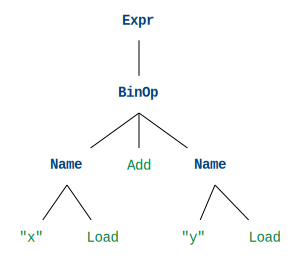

In [2]:
from showast import show_ast

show_ast(add_tree)

In this example the addition is packed into a function. Here we see how actual python code is represented as an AST. I don't show the dump of the AST, since it is already very convoluted, but with such a dump you could see how to create the AST directly from the ast module.
The visualization shows us, that there are several new nodes which define the function, arguments, return statement and variable definitions. We get the source code from a function with the inspect module. It would be also possible to visualize a function directly with show_source from the showast module.

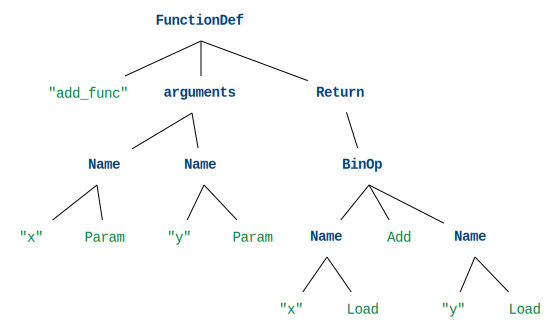

In [3]:
import inspect

def add_func(x, y):
    return x + y

add_func_tree = ast.parse(inspect.getsource(add_func))
show_ast(add_func_tree)

Python itself doesn’t provide a way to turn a compiled code object into an AST. There are third party tools that can do this. Astor is such a package.

In [4]:
import astor

print(astor.to_source(add_func_tree))

def add_func(x, y):
    return (x + y)


The last examples shows how to create an AST directly with the ast module. Here you see the implementation of the leibniz formula. This is a formula to calculate the value of pi. The number of iterations corresponds to the accuracy of the result. Here we see why we are writing programs in a programming language and not as an AST. The tree representation is nearly unreadable. You can imagine that modules with hundreds or thousands lines of code result in humongous trees.

In [5]:
arguments = ast.arguments(args=[ast.Name(id='iterations', ctx=ast.Param())], vararg=None, kwarg=None, defaults=[])

pi_quarter = ast.Assign(targets=[ast.Name(id='pi_quarter', ctx=ast.Store())], value=ast.Num(n=0.0))

step_value = ast.BinOp(left=ast.BinOp(left=ast.Num(n=-1.0), op=ast.Pow(), right=ast.Name(id='step', ctx=ast.Load())),
                       op=ast.Div(), right=ast.BinOp(left=ast.BinOp(left=ast.Num(n=2.0),
                                                                    op=ast.Mult(),
                                                                    right=ast.Name(id='step', ctx=ast.Load())),
                                                     op=ast.Add(), right=ast.Num(n=1.0)))
for_loop = ast.For(target=ast.Name(id='step', ctx=ast.Store()),
                   iter=ast.Call(func=ast.Name(id='range', ctx=ast.Load()),
                                 args=[ast.Name(id='iterations', ctx=ast.Load())],
                                 keywords=[], starargs=None, kwargs=None),
                   body=[ast.AugAssign(target=ast.Name(id='pi_quarter', ctx=ast.Store()),
                                       op=ast.Add(), value=step_value)], orelse=[])
pi = ast.Assign(targets=[ast.Name(id='pi', ctx=ast.Store())],
                value=ast.BinOp(left=ast.Num(n=4.0), op=ast.Mult(), right=ast.Name(id='pi_quarter', ctx=ast.Load())))
func = ast.FunctionDef(name='leibniz_formula',
                       args=arguments,
                       body=[pi_quarter, for_loop, pi, ast.Return(value=ast.Name(id='pi', ctx=ast.Load()))],
                       decorator_list=[])
ast_leibniz_formula = ast.fix_missing_locations(ast.Module(body=[func]))

print(astor.to_source(ast_leibniz_formula))

def leibniz_formula(iterations):
    pi_quarter = 0.0
    for step in range(iterations):
        pi_quarter += (((-1.0) ** step) / ((2.0 * step) + 1.0))
    pi = (4.0 * pi_quarter)
    return pi


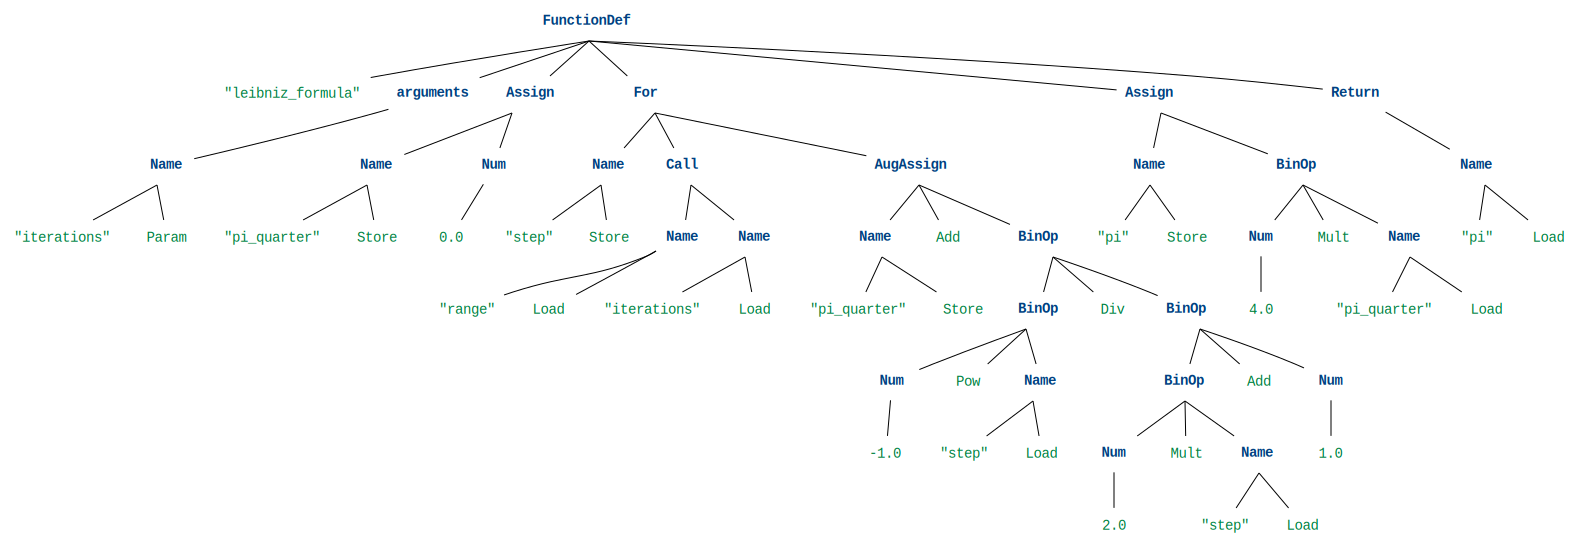

In [6]:
show_ast(ast_leibniz_formula)

We can compile and execute our newly created function with the built-in compile function and the exec statement. The leibniz_formula is now usable as function we are used to in Python.

In [7]:
exec(compile(ast_leibniz_formula, filename='<ast>', mode='exec'))
print(leibniz_formula(1000))

3.14059265384
